Hello Kagglers,

K-Means clustering is the most popular unsupervised machine learning algorithm, which is used when you have unlabeled data. The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:
* The centroids of the K clusters, which can be used to label new data
* Labels for the training data (each data point is assigned to a single cluster)

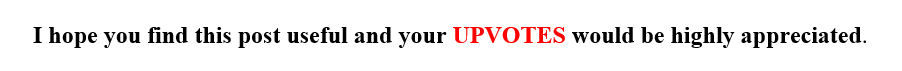

So, let's go.

# **How Does the K-means clustering algorithm work?**

K-Means clustering can be represented diagrammatically as follows:
![Image](https://miro.medium.com/max/1122/0*mQCGBdYhzZ8YMZPv.png)

k-means clustering tries to group similar kinds of items in form of clusters. It finds the similarity between the items and groups them into the clusters. K-means clustering algorithm works in four steps:

Step 1 − First, we need to specify the number of clusters, K, need to be generated by this algorithm.

Step 2 − Next, randomly select K data points and assign each data point to a cluster. In simple words, classify the data based on the number of data points.

Step 3 − Now, it will compute the cluster centroids.

Step 4 − Next, keep iterating the following until we find optimal centroid which is the assignment of data points to the clusters that are not changing any more:

    4.1. First, the sum of squared error (SSE) between data points and centroids would be computed.
   
    4.2. Now, we have to assign each data point to the cluster that is closer than other cluster (centroid).
  
    4.3. At last compute the centroids for the clusters by taking the average of all data points of that cluster.


Figures 1 to 4 represent a simple explanation of the K-Means algorithm:

![Image](https://editor.analyticsvidhya.com/uploads/34513k%20means.png)


Figure 1 shows the representation of data of two different items. the first item has shown in blue color and the second item has shown in red color. In the first step, the value of K is chosen randomly.
    In figure 2, to find out centroid, we will draw a perpendicular line to that line. The points will move to their centroid. If you will notice there, then you will see that some of the red points are now moved to the blue points. Now, these points belong to the group of blue color items.
    The same process will be done in figure 3. The two points are joined and a new perpendicular line is drawn to find the centroid. Again, some of the red points get converted to blue points.
    The same process is happening in figure 4. This process will be continued until and unless we get two completely different clusters of these groups.
    we will keep iterating the following until we find optimal centroid which is the assignment of data points to the clusters that are not changing any more

    NOTE: Please note that the K-means clustering uses the euclidean distance method to find out the distance between the points




# **How to pick the optimal value of K?**

the performance of K-Means algorithm depends upon the value of K. We should choose the optimal value of K to have best performance. There are different techniques to find the optimal value of K. The most common technique is the "elbow method" which is described below.

![Image](https://editor.analyticsvidhya.com/uploads/62725cluster0.PNG)

Elbow method is an empirical method to find out the best value of k. it picks up a range of values and takes the best among them by running the algorithm multiple times over a loop, with an increasing number of cluster choice and then plotting a clustering score as a function of the number of clusters.

    Note: the elbow method calculates the sum of the square of the points and calculates the average distance.

# **Import Libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customers/Mall_Customers.csv


# **Import dataset**

In [2]:
data='/kaggle/input/mall-customers/Mall_Customers.csv'
df=pd.read_csv(data)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


As you can see, there are 5 columns in the dataset. For the sake of simplicity, in this example, I am using the columns "*Spending Score (1-100)*" and "*Annual Income (k$)*"

The scatter plot of the 2 columns is shwon in the next cell.

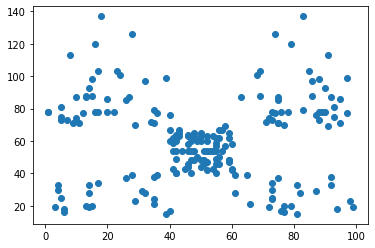

In [3]:
plt.scatter(df["Spending Score (1-100)"],df["Annual Income (k$)"])

As we can see, five different clusters are seen in the image. so, I am picking 5 as the number of clusters.

In [4]:
km=KMeans(n_clusters=5)
y_predicted=km.fit_predict(df[["Spending Score (1-100)","Annual Income (k$)"]])

Now, I am creating a new column "cluster" and copy the predictions to the new column

In [5]:
df["cluster"]=y_predicted
#df2=df.drop(['Age','Genre','CustomerID'], axis=1)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


now, we need to separate the 5 clusters into different dataframes. then plot the clusters in different colors

Text(0, 0.5, 'Annual Income')

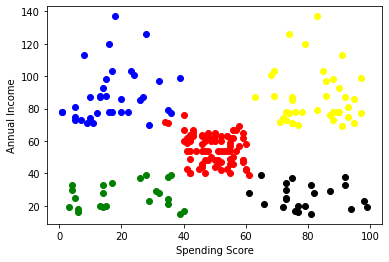

In [6]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]

plt.scatter(df1["Spending Score (1-100)"],df1["Annual Income (k$)"],color='green')
plt.scatter(df2["Spending Score (1-100)"],df2["Annual Income (k$)"],color='blue')
plt.scatter(df3["Spending Score (1-100)"],df3["Annual Income (k$)"],color='red')
plt.scatter(df4["Spending Score (1-100)"],df4["Annual Income (k$)"],color='yellow')
plt.scatter(df5["Spending Score (1-100)"],df5["Annual Income (k$)"],color='black')

plt.xlabel('Spending Score')
plt.ylabel('Annual Income')

In some cases the data is not clustered optimally. This is due to the fact that our scaling is not right and there is a big gap between the values in the y-axis and the x-axis. So, we need to scale the data prior to the clustreing.
let's do the scaling with the MinMaxSclaer which we already imorted the library.

In [7]:
scaler=MinMaxScaler()

df['Spending Score (1-100)']=scaler.fit_transform(df[['Spending Score (1-100)']])
df["Annual Income (k$)"]=scaler.fit_transform(df[['Annual Income (k$)']])

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,0.000000,0.387755,0
1,2,Male,21,0.000000,0.816327,4
2,3,Female,20,0.008197,0.051020,0
3,4,Female,23,0.008197,0.775510,4
4,5,Female,31,0.016393,0.397959,0


Now, plot the scaled values

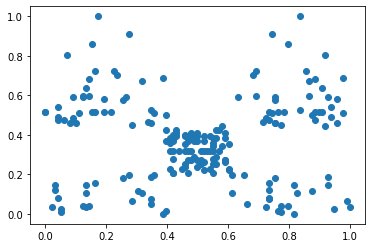

In [8]:
plt.scatter(df["Spending Score (1-100)"],df["Annual Income (k$)"])

Again, the same process with the scaled data

In [9]:
km=KMeans(n_clusters=5)
y_predicted=km.fit_predict(df[['Spending Score (1-100)',"Annual Income (k$)"]])
df.cluster=y_predicted
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,0.000000,0.387755,0
1,2,Male,21,0.000000,0.816327,1
2,3,Female,20,0.008197,0.051020,0
3,4,Female,23,0.008197,0.775510,1
4,5,Female,31,0.016393,0.397959,0


we can obtain the value of the cenroids by the "cluster_centers_"

In [10]:
km.cluster_centers_

array([[0.20319432, 0.09265859],
       [0.79962894, 0.08792846],
       [0.82783883, 0.58638083],
       [0.16443149, 0.6       ],
       [0.49508692, 0.33029751]])

in the next plot, I am showing the cenroids by purple color and the * marker

Text(0, 0.5, 'Annual Income')

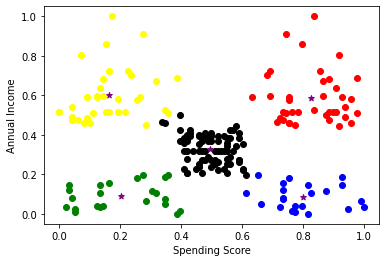

In [11]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]

plt.scatter(df1["Spending Score (1-100)"],df1["Annual Income (k$)"],color='green')
plt.scatter(df2["Spending Score (1-100)"],df2["Annual Income (k$)"],color='blue')
plt.scatter(df3["Spending Score (1-100)"],df3["Annual Income (k$)"],color='red')
plt.scatter(df4["Spending Score (1-100)"],df4["Annual Income (k$)"],color='yellow')
plt.scatter(df5["Spending Score (1-100)"],df5["Annual Income (k$)"],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*')

plt.xlabel('Spending Score')
plt.ylabel('Annual Income')

Now, let's find the optimal value of K by using the elbow method. 

we will try the K values from 1 to 10 and we will copy the SSE values to the sse.

In [12]:
k_rng=range(1,11)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Spending Score (1-100)',"Annual Income (k$)"]])
    sse.append(km.inertia_)

No, let's plot the sse plot. As we can see, the K=5 is the optimal value 

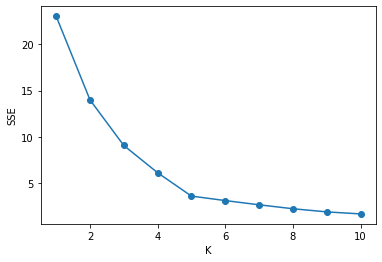

In [13]:
plt.xlabel('K')
plt.ylabel('SSE')

plt.plot(k_rng,sse)
plt.scatter(k_rng,sse)

# **Summary**

In this project, I implemented the most popular unsupervised clustering technique called K-Means Clustering.

1. I showed how we can use sclaing to normalize the input data in case of having a large gap betwwn the input features.
1. I applied the elbow method. The elbow method show that K=5 (k is number of clusters) can be considered an optimal number of cluster.







# **References**

https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_clustering_algorithms_k_means.htm

https://www.youtube.com/watch?v=EItlUEPCIzM

https://www.analyticsvidhya.com/blog/2020/10/a-simple-explanation-of-k-means-clustering/

